# 散点图回归分析

绘制 price-accessbility 散点图，简单回归分析看是否存在非线性/线性关系（walk+bike）

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read CSV
df = pd.read_csv(r"F:\a\R\data\properties-with-accessibility-common-sample-2024-6030.csv")

print(df.head()) 

   property_id  listing_id        property_type     category  zoopla_year  \
0      5288984    53336921                 Flat  Residential         2024   
1      5292580    66618804  Semi-detached house  Residential         2024   
2      5294934    65391822                 Flat  Residential         2024   
3      5294979    66401413                  NaN  Residential         2024   
4      5296432    69634590  Semi-detached house  Residential         2024   

   price_last  num_bed_max  num_floors_max  num_bathrooms_max  \
0         334            1               0                  1   
1         312            1               0                  1   
2         438            3               0                  1   
3         577            4               0                  2   
4         161            1               0                  1   

   num_receptions_max     pcu   latitude  longitude    lad20cd lad20nm  \
0                   1  CR42DA  51.415165  -0.156317  E09000024  Merton  

## 初步绘制散点图，并分别采用 99%分位数 / IQR规则 过滤极端值，便于观察关系

Relationship between Weekly Rent Price and Walking Time and Cycling Time to Nearest Station, Illustrated with Linear Regression Lines After Different Outlier Removal Methods.

数据将被过滤，只保留周租金低于 £3750.00 (99%分位数) 的房产。
根据IQR规则，只保留周租金低于 £1287.00 的房产。


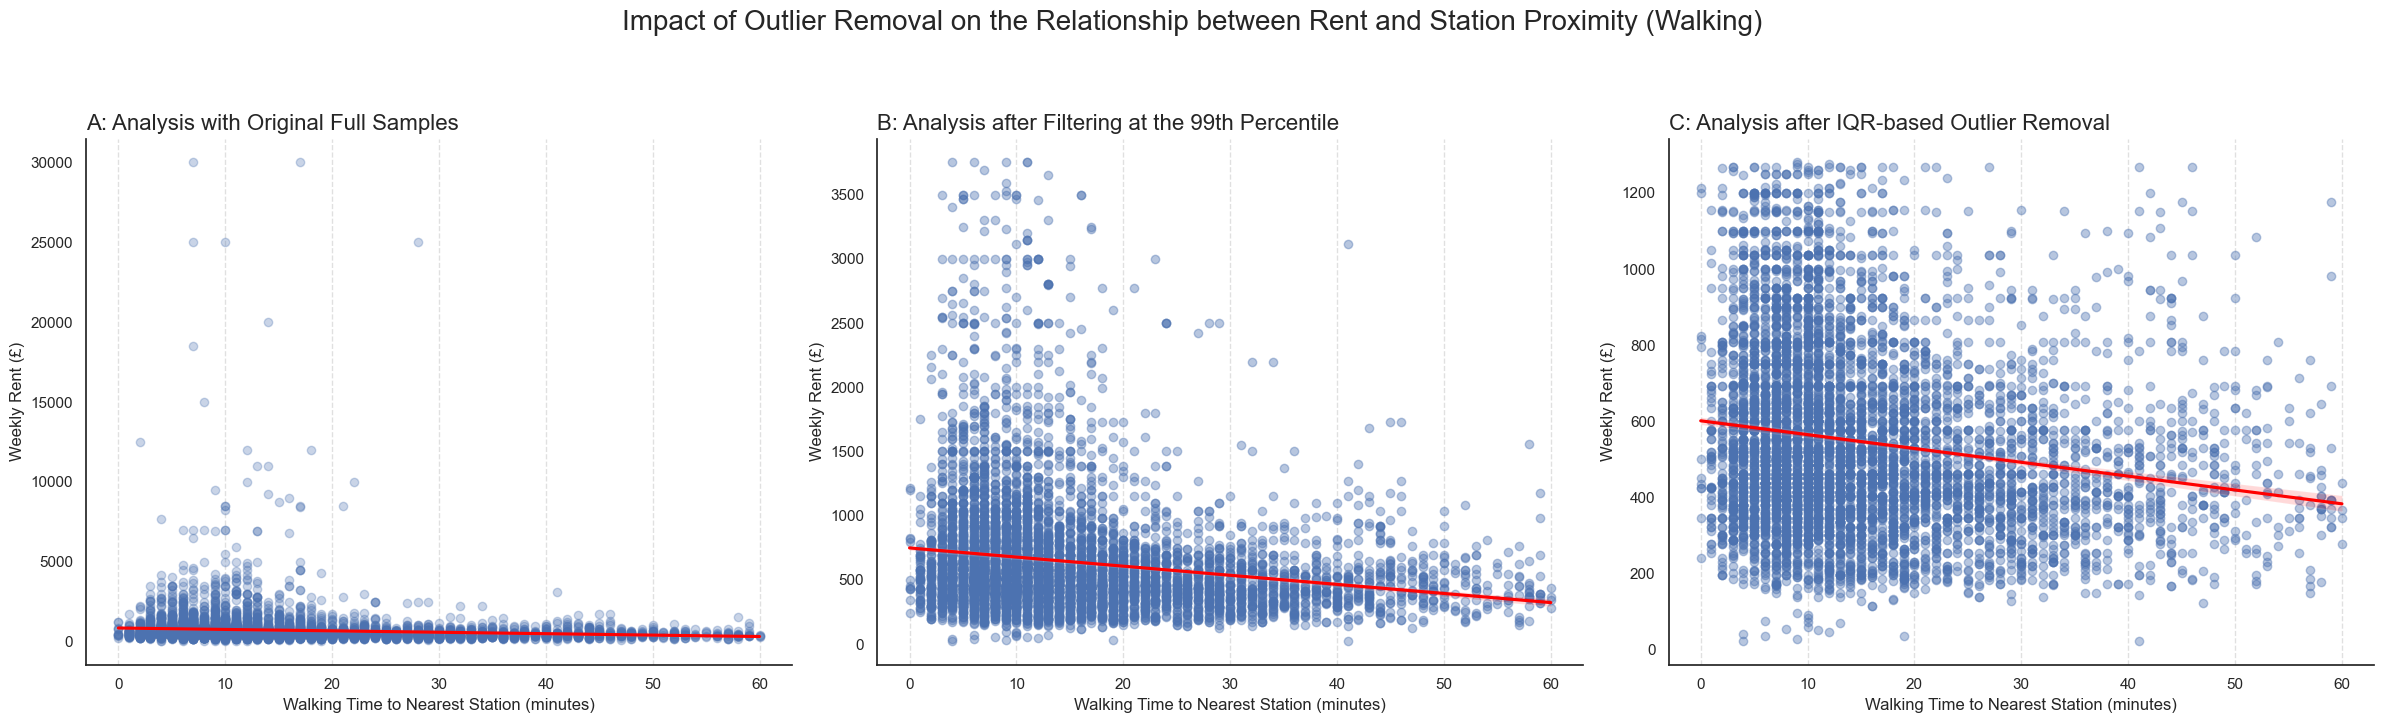

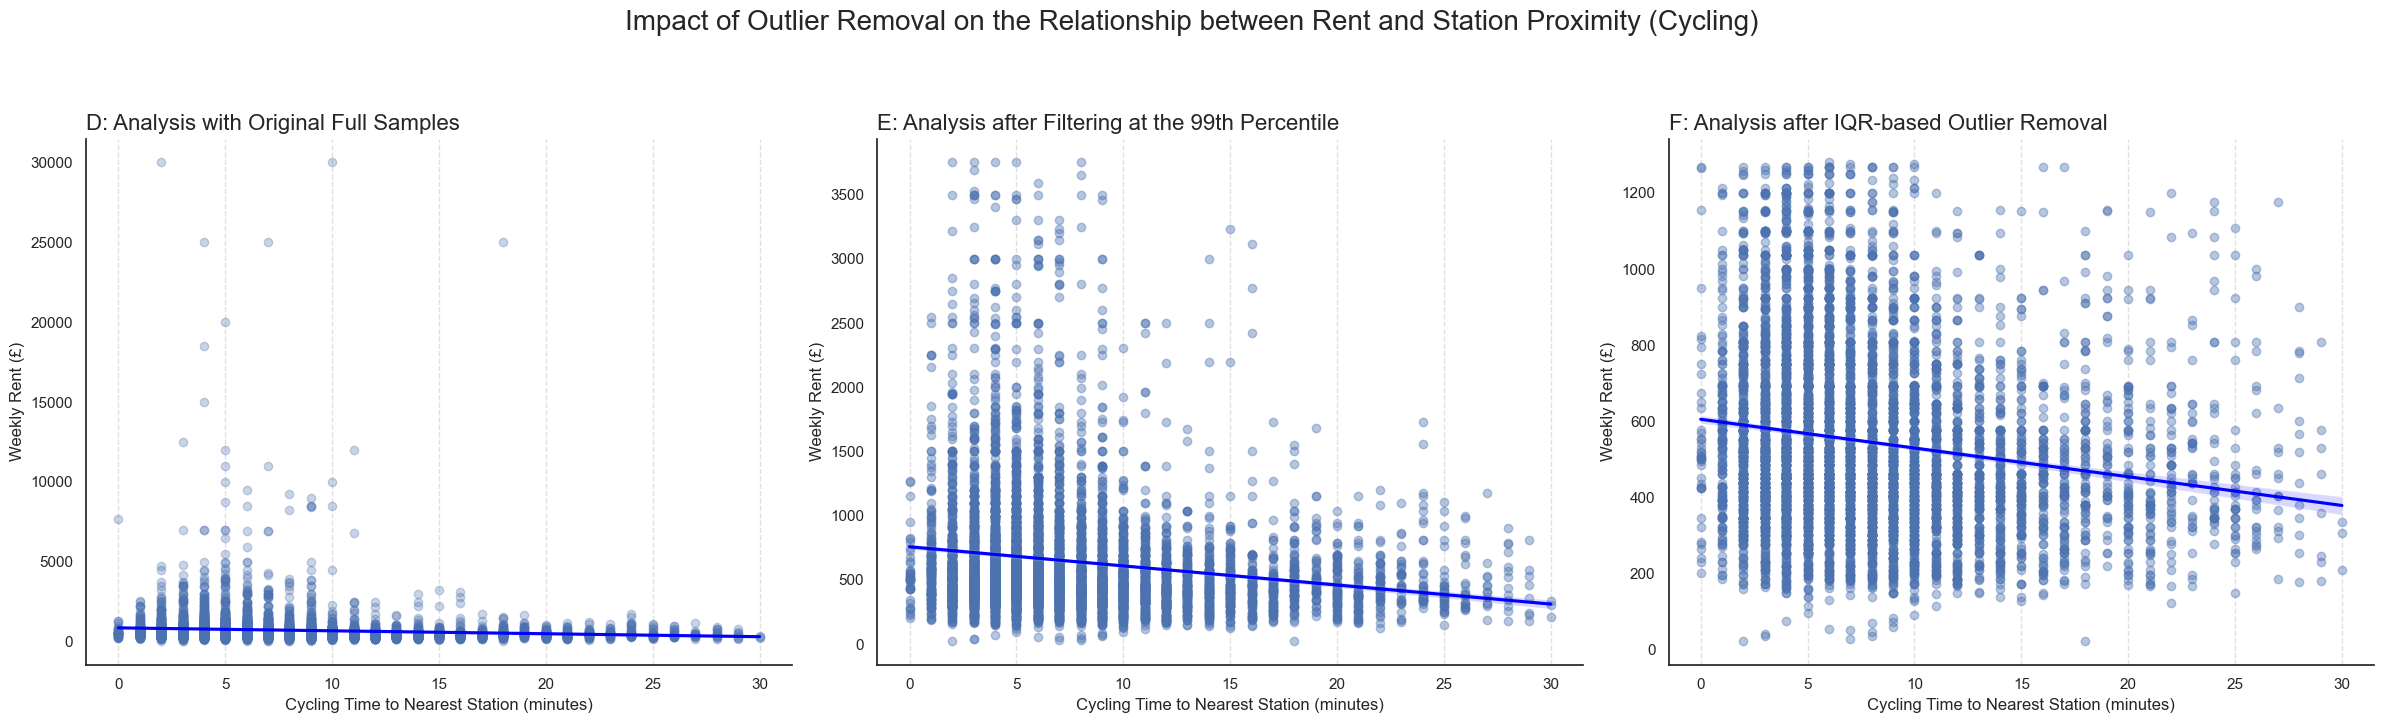

In [20]:

# 方法一：99%分位数
price_cap_99 = df['price_last'].quantile(0.99)
df_filtered_99 = df[df['price_last'] <= price_cap_99]
print(f"数据将被过滤，只保留周租金低于 £{price_cap_99:.2f} (99%分位数) 的房产。")

# 方法二：IQR
Q1 = df['price_last'].quantile(0.25)
Q3 = df['price_last'].quantile(0.75)
IQR = Q3 - Q1
upper_bound_iqr = Q3 + 1.5 * IQR
df_filtered_iqr = df[df['price_last'] <= upper_bound_iqr]
print(f"根据IQR规则，只保留周租金低于 £{upper_bound_iqr:.2f} 的房产。")


# --- 3. 绘图设置 ---
sns.set_theme(style="white") # 设置一个更简洁的主题


# ==============================================================================
# 图组 1: 步行时间 (Walk Time) - 1x3 平行布局 (独立Y轴)
# ==============================================================================
# 创建一个 1x3 的子图布局，【注意】这里移除了 sharey=True
fig_walk, axes_walk = plt.subplots(1, 3, figsize=(24, 7))
fig_walk.suptitle('Impact of Outlier Removal on the Relationship between Rent and Station Proximity (Walking)', fontsize=20, y=1.03)

# --- 图 1.1: 原始数据 ---
sns.regplot(
    ax=axes_walk[0],
    data=df,
    x='walk_time_to_nearest_station',
    y='price_last',
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)
axes_walk[0].set_title('A: Analysis with Original Full Samples', fontsize=16, loc='left')
axes_walk[0].set_xlabel('Walking Time to Nearest Station (minutes)', fontsize=12)
axes_walk[0].set_ylabel('Weekly Rent (£)', fontsize=12)

# --- 图 1.2: 99%分位数过滤 ---
sns.regplot(
    ax=axes_walk[1],
    data=df_filtered_99,
    x='walk_time_to_nearest_station',
    y='price_last',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
axes_walk[1].set_title('B: Analysis after Filtering at the 99th Percentile', fontsize=16, loc='left')
axes_walk[1].set_xlabel('Walking Time to Nearest Station (minutes)', fontsize=12)
axes_walk[1].set_ylabel('Weekly Rent (£)', fontsize=12) # 重新添加Y轴标签

# --- 图 1.3: IQR过滤 ---
sns.regplot(
    ax=axes_walk[2],
    data=df_filtered_iqr,
    x='walk_time_to_nearest_station',
    y='price_last',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
axes_walk[2].set_title('C: Analysis after IQR-based Outlier Removal', fontsize=16, loc='left')
axes_walk[2].set_xlabel('Walking Time to Nearest Station (minutes)', fontsize=12)
axes_walk[2].set_ylabel('Weekly Rent (£)', fontsize=12) # 重新添加Y轴标签

# 对整行图应用格式化
for ax in axes_walk:
    ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.97])
sns.despine(fig=fig_walk)


# ==============================================================================
# 图组 2: 骑行时间 (Bike Time) - 1x3 平行布局 (独立Y轴)
# ==============================================================================
# 创建一个新的 1x3 子图布局
fig_bike, axes_bike = plt.subplots(1, 3, figsize=(24, 7))
fig_bike.suptitle('Impact of Outlier Removal on the Relationship between Rent and Station Proximity (Cycling)', fontsize=20, y=1.03)

# --- 图 2.1: 原始数据 ---
sns.regplot(
    ax=axes_bike[0],
    data=df,
    x='bike_time_to_nearest_station',
    y='price_last',
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'blue'}
)
axes_bike[0].set_title('D: Analysis with Original Full Samples', fontsize=16, loc='left')
axes_bike[0].set_xlabel('Cycling Time to Nearest Station (minutes)', fontsize=12)
axes_bike[0].set_ylabel('Weekly Rent (£)', fontsize=12)

# --- 图 2.2: 99%分位数过滤 ---
sns.regplot(
    ax=axes_bike[1],
    data=df_filtered_99,
    x='bike_time_to_nearest_station',
    y='price_last',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'blue'}
)
axes_bike[1].set_title('E: Analysis after Filtering at the 99th Percentile', fontsize=16, loc='left')
axes_bike[1].set_xlabel('Cycling Time to Nearest Station (minutes)', fontsize=12)
axes_bike[1].set_ylabel('Weekly Rent (£)', fontsize=12) # 重新添加Y轴标签

# --- 图 2.3: IQR过滤 ---
sns.regplot(
    ax=axes_bike[2],
    data=df_filtered_iqr,
    x='bike_time_to_nearest_station',
    y='price_last',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'blue'}
)
axes_bike[2].set_title('F: Analysis after IQR-based Outlier Removal', fontsize=16, loc='left')
axes_bike[2].set_xlabel('Cycling Time to Nearest Station (minutes)', fontsize=12)
axes_bike[2].set_ylabel('Weekly Rent (£)', fontsize=12) # 重新添加Y轴标签

# 对整行图应用格式化
for ax in axes_bike:
    ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.97])
sns.despine(fig=fig_bike)

# 显示所有创建的图形
plt.show()

## 根据数据特征选择合适的回归方法

您生成的这张图（在剔除极端值后）非常完美地揭示了数据的一个重要特征，而这个特征正是导致简单线性回归模型效果不佳的根本原因。
您所说的“数据大量均匀的分布在一侧”在统计学上被称为 异方差性 (Heteroscedasticity)。

什么是异方差性 (Heteroscedasticity)？
简单来说，就是因变量（租金 price_last）的波动范围（方差）随着自变量（步行时间 walk_time）的变化而变化。

在您的图中：

当步行时间很短时（例如0-15分钟），租金的分布范围很广，从£200到£1200以上都有，方差很大。这很合理，因为市中心的房产（步行时间短）既有便宜的小单间，也有昂贵的大公寓，价格差异巨大。

当步行时间很长时（例如40分钟以上），租金的分布范围变得非常窄，大部分都集中在较低的价位，方差很小。这也符合直觉，因为郊区的房产价格普遍偏低，选择也较少。

标准的线性回归模型有一个基本假设，即方差是恒定的（同方差性）。当这个假设被违背时，回归线虽然能描绘出平均趋势（步行越久，平均租金越低），但它忽略了数据波动性的巨大变化，因此模型解释力很差，预测也不准确。


1 分箱与箱形图 (Binning and Box Plots) - 最佳可视化方法

d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\cihshee\AppData\Local\Temp\ipykernel_4812\3434480465.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.98])


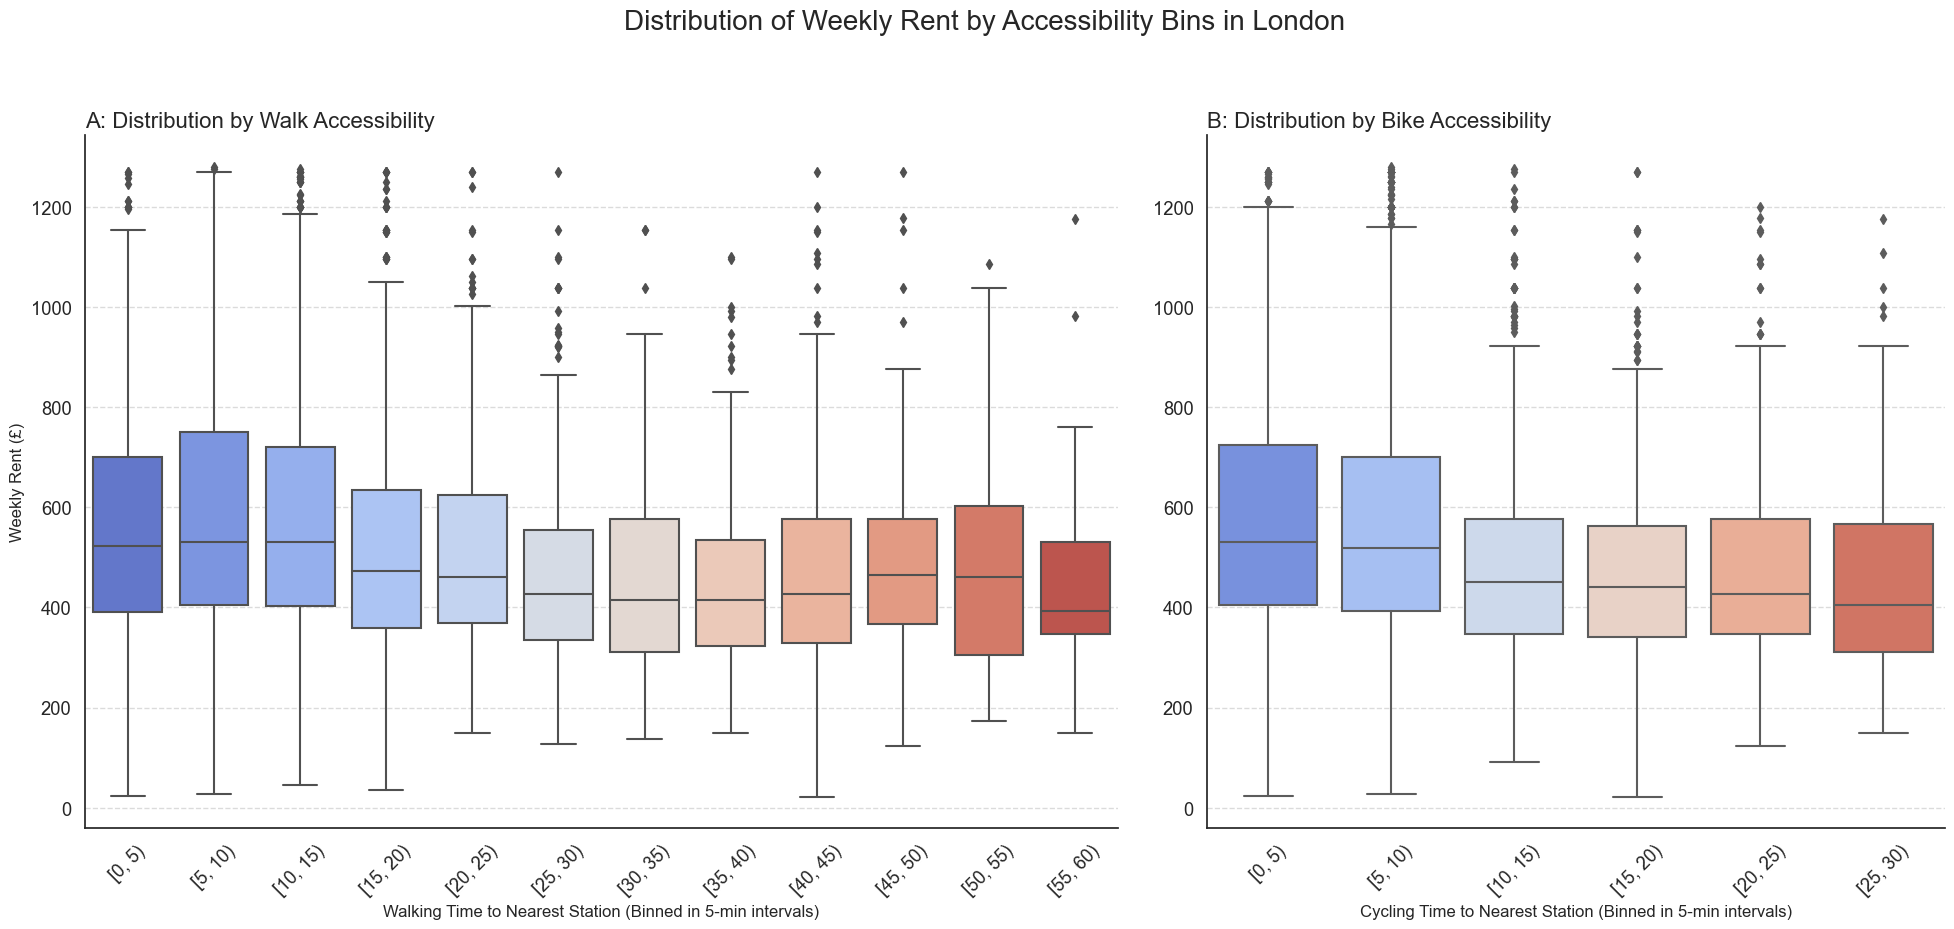

In [21]:
import numpy as np
import matplotlib.gridspec as gridspec # 导入 GridSpec 模块


# --- 1. 创建分箱 (与之前相同) ---
df_binned = df_filtered_iqr.copy()
walk_bins = np.arange(0, df_binned['walk_time_to_nearest_station'].max() + 5, 5)
df_binned['walk_time_bin'] = pd.cut(df_binned['walk_time_to_nearest_station'], bins=walk_bins, right=False)
bike_bins = np.arange(0, df_binned['bike_time_to_nearest_station'].max() + 5, 5)
df_binned['bike_time_bin'] = pd.cut(df_binned['bike_time_to_nearest_station'], bins=bike_bins, right=False)


# --- 2. 使用 GridSpec 创建自定义布局 ---

# 设置整体风格
sns.set_theme(style="white", font_scale=1.2)

# 创建一个图形对象
fig = plt.figure(figsize=(24, 9))

# 创建一个 1x2 的网格，宽度比例为 7:5，并设置间距
# wspace=0.1 表示子图间距为平均子图宽度的10%
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[7, 5], wspace=0.1)

# 根据网格创建子图
ax1 = fig.add_subplot(gs[0, 0])
# 创建第二个子图时，通过 sharey=ax1 共享Y轴
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)

# 设置总标题
fig.suptitle('Distribution of Weekly Rent by Accessibility Bins in London', fontsize=20, y=1.02)


# --- 子图 A (60%宽度): 步行可达性 ---
sns.boxplot(
    ax=ax1, # 绘图目标是 ax1
    data=df_binned,
    x='walk_time_bin',
    y='price_last',
    palette='coolwarm'
)
ax1.set_title('A: Distribution by Walk Accessibility', fontsize=16, loc='left')
ax1.set_xlabel('Walking Time to Nearest Station (Binned in 5-min intervals)', fontsize=12)
ax1.set_ylabel('Weekly Rent (£)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)


# --- 子图 B (40%宽度): 骑行可达性 ---
sns.boxplot(
    ax=ax2, # 绘图目标是 ax2
    data=df_binned,
    x='bike_time_bin',
    y='price_last',
    palette='coolwarm'
)
ax2.set_title('B: Distribution by Bike Accessibility', fontsize=16, loc='left')
ax2.set_xlabel('Cycling Time to Nearest Station (Binned in 5-min intervals)', fontsize=12)
ax2.set_ylabel('')
ax2.tick_params(axis='x', rotation=45)


# --- 统一格式化 ---
# 为两个子图添加水平网格线并移除边框
for ax in [ax1, ax2]:
    ax.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine(fig=fig)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

2 分位数回归 (Quantile Regression)

为什么要选择分位数回归 (Quantile Regression)？
选择分位数回归而不是传统的线性回归（它只分析均值），主要是基于您数据本身呈现出的一个非常重要的特性：异方差性（Heteroscedasticity），也就是您图中的“扇形”或“喇叭形”分布。

简单来说，选择分位数回归有以下三个核心理由：

超越“平均值”，探究完整图景:

传统的线性回归只会给您一条线，代表“平均”租金随步行时间的变化趋势。但在您的数据中，“平均”这个概念具有误导性。

当步行时间很短（例如5分钟）时，租金的范围从£200到£1200以上，跨度巨大。用一个“平均值”来概括这里的租金水平，会丢失大量关于高价房和低价房的重要信息。

分位数回归允许我们同时观察不同价位房产的趋势。例如，我们可以分别对低价房（如25%分位数）、中价房（50%分位数，即中位数）和高价房（75%分位数）建立模型，从而得到一个更全面、更有深度的理解。

专门应对“异方差性”（扇形分布）:

“异方差性”指的是因变量（租金）的波动范围随着自变量（步行时间）的变化而变化。在您的图中，步行时间越短，租金的波动范围（方差）越大；时间越长，波动范围越小。

这是传统线性回归模型的一个“禁区”，因为它假设方差是恒定的。而分位数回归天然地就是为分析这种数据结构而设计的。通过比较不同分位数回归线的斜率，我们可以量化地描述这个“扇形”是如何形成的。

结果更稳健（Robust）:

由于分位数回归（尤其是中位数回归，即Q=0.5）是基于数据的排序位置，而不是其具体数值，因此它对数据中的极端异常值（Outliers）没有那么敏感。相比之下，传统线性回归的“平均值”很容易被一两个极端高价或低价的房子带偏。

一句话总结：当数据呈现“扇形”分布时，传统回归只能无力地画出一条穿过中心的“平均线”，而分位数回归则能清晰地描绘出这个“扇形”的上边界、下边界和中心趋势是如何变化的，让我们看清全局。


             Quantile Regression Statistical Summaries

--- Quantile Regression Summary for q=0.25 ---
                         QuantReg Regression Results                          
Dep. Variable:             price_last   Pseudo R-squared:              0.01123
Model:                       QuantReg   Bandwidth:                       49.33
Method:                 Least Squares   Sparsity:                        516.0
Date:                Wed, 20 Aug 2025   No. Observations:                 6696
Time:                        17:45:47   Df Residuals:                     6694
                                        Df Model:                            1
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      416.0000      4.494     92.575      0.000     407.191     424.809
walk_time_to_nearest_station    -2.3333      0.231   

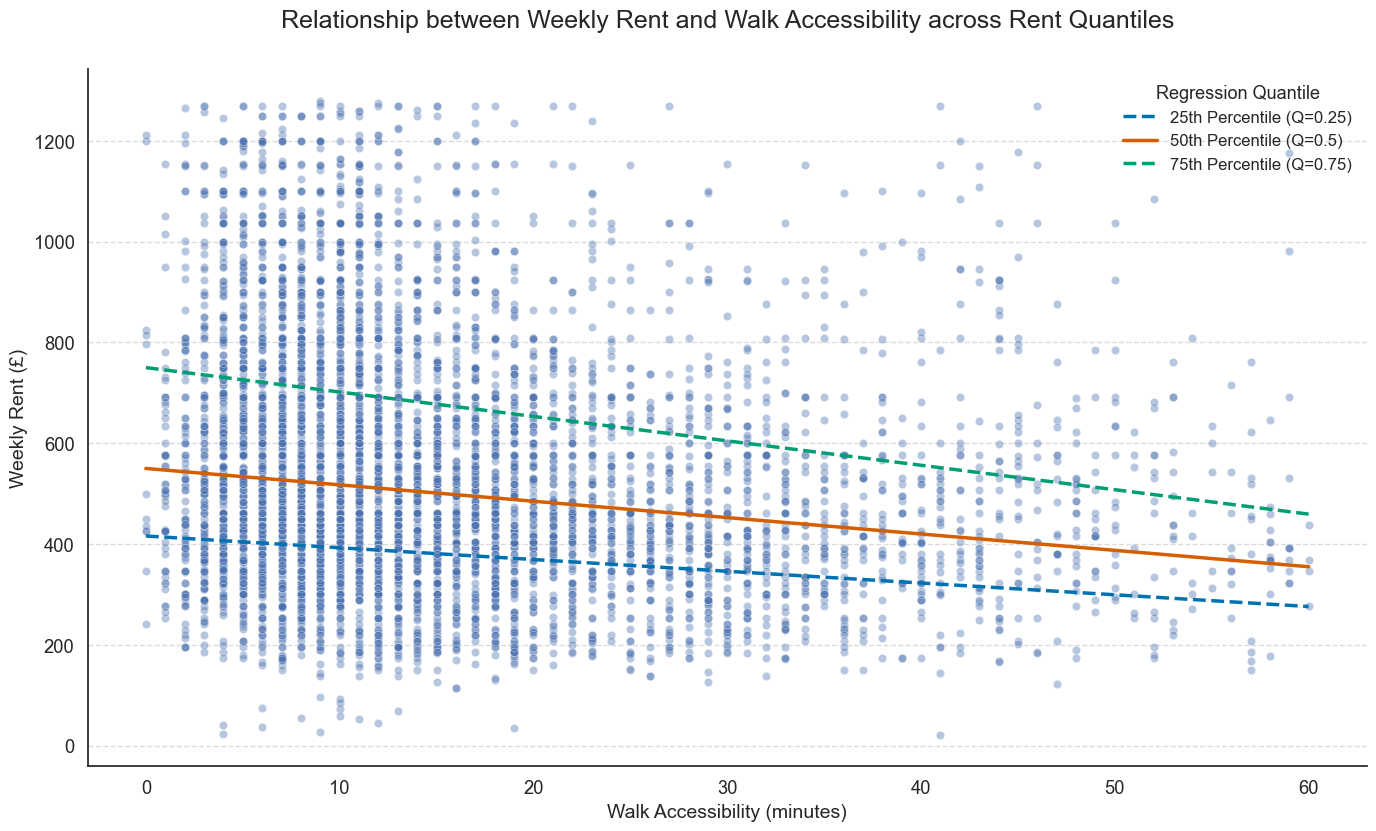

In [24]:
import statsmodels.formula.api as smf

# ==============================================================================
# 1. 新增：打印分位数回归模型结果
# ==============================================================================
print("="*80)
print("             Quantile Regression Statistical Summaries")
print("="*80)

# 定义要计算的分位数
quantiles = [0.25, 0.5, 0.75]

# 循环计算并打印每一个分位数回归模型的结果
for q in quantiles:
    # 建立模型
    model = smf.quantreg('price_last ~ walk_time_to_nearest_station', df_filtered_iqr)
    result = model.fit(q=q)
    
    # 打印带标题的摘要
    print(f"\n--- Quantile Regression Summary for q={q} ---")
    print(result.summary())
    print("="*80)


# ==============================================================================
# 2. 修改：绘制更学术化的图表
# ==============================================================================

# --- 设置图表风格 ---
sns.set_theme(style="white", font_scale=1.2)
fig, ax = plt.subplots(figsize=(14, 9))

# --- 绘制背景散点图 ---
sns.scatterplot(
    data=df_filtered_iqr, 
    x='walk_time_to_nearest_station', 
    y='price_last', 
    alpha=0.4,       # 将透明度调得更低，让回归线更突出
    label='_nolegend_',
    ax=ax
)

# --- 循环计算并绘制回归线 ---
colors = ['#0072B2', '#D55E00', '#009E73'] # 使用对色盲友好的颜色
line_styles = ['--', '-', '--'] # 使用不同线型区分

for i, q in enumerate(quantiles):
    # 模型拟合 (重复计算以便与绘图逻辑一致)
    model = smf.quantreg('price_last ~ walk_time_to_nearest_station', df_filtered_iqr)
    result = model.fit(q=q)
    
    # 准备绘图数据
    x_range = np.linspace(df_filtered_iqr['walk_time_to_nearest_station'].min(), df_filtered_iqr['walk_time_to_nearest_station'].max(), 100)
    y_pred = result.predict({'walk_time_to_nearest_station': x_range})
    
    # 绘制回归线
    ax.plot(x_range, y_pred, 
            label=f'{int(q*100)}th Percentile (Q={q})', # 修改图例文字
            color=colors[i], 
            linestyle=line_styles[i],
            linewidth=2.5)

# --- 美化图表 ---
# 修改标题和副标题
ax.set_title(
    'Relationship between Weekly Rent and Walk Accessibility across Rent Quantiles', 
    fontsize=18, pad=30, loc='center'
)

# 修改轴标签
ax.set_xlabel('Walk Accessibility (minutes)', fontsize=14)
ax.set_ylabel('Weekly Rent (£)', fontsize=14)

# 添加图例
ax.legend(title='Regression Quantile', fontsize=12, title_fontsize=13, frameon=False)

# 添加水平网格线并移除边框
ax.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(ax=ax)

# 调整布局
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

首先是每个模型内部的关键参数，其次是综合比较三个模型，最后得出总结论。

-----

### 1\. 如何解读单张结果表

我们以 **中位数回归 (q=0.5)** 的结果表为例，其他两张表的结构完全相同。

```
--- Quantile Regression Summary for q=0.5 ---
Dep. Variable:      price_last     Pseudo R-squared:   0.01598
No. Observations:         6696
================================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept              550.0000      5.502     99.956      0.000     539.213     560.787
walk_time_to_nearest_station  -3.2500      0.287    -11.334      0.000      -3.812      -2.688
```

  * **`Pseudo R-squared: 0.01598`**:

      * **含义**: 伪R平方，衡量模型的拟合优度。这里的`0.01598`意味着，对于中位数租金的变化，步行时间这个变量能够解释其中的**约1.6%**。
      * **解读**: 这个值本身很低，但这在预期之内。因为决定租金的因素非常多（如卧室数、面积、地段、装修等），单一一个“步行时间”变量不可能解释大部分的价格变化。这并不意味着模型无效，而是说明步行时间只是众多影响因素之一。

  * **`No. Observations: 6696`**:

      * **含义**: 您的模型是基于 6,696 个房产数据点进行计算的（这是IQR过滤后的样本量）。

  * **`Intercept` 的 `coef: 550.0000`**:

      * **含义**: 这是模型的**截距**。它代表当自变量（步行时间）为0时，因变量（租金）的预测值。
      * **解读**: 根据中位数模型，对于一个步行至地铁站时间为0分钟的“典型”房产，其预测的周租金**中位数**为 **£550**。

  * **`walk_time_to_nearest_station` 的 `coef: -3.2500`**:

      * **含义**: 这是核心的**回归系数（斜率）**。它表示自变量每增加一个单位，因变量的预测变化量。
      * **解读**: 对于一个“典型”的房产，**步行时间每增加1分钟，其周租金中位数预计会下降 £3.25**。这个负号表示它们之间是负相关关系。

  * **`P>|t|: 0.000`**:

      * **含义**: 这是**P值**，用于判断结果的统计显著性。
      * **解读**: P值为0.000（远小于常规的0.05阈值），说明步行时间对租金的影响是**高度统计显著的**。换句话说，我们非常有把握地认为这种负相关关系不是偶然的，而是一个真实存在的规律。

  * **`[0.025, 0.975]`**:

      * **含义**: 这是系数的**95%置信区间**。
      * **解读**: 我们有95%的信心认为，步行时间每增加1分钟所带来的真实影响，落在了 **-£3.812** 和 **-£2.688** 之间。由于这个区间不包含0，也进一步证实了结果的显著性。

-----

### 2\. 综合比较三个模型的结果

现在，我们将三个模型的结果并列来看，这正是分位数回归的威力所在：

| 分位数 (Quantile) | 市场定位     | 截距 (Intercept) | 步行时间系数 (coef) | 伪R平方 (Pseudo R-squared) |
| :---------------- | :----------- | :--------------- | :------------------ | :------------------------- |
| **q = 0.25** | 低价位房产   | £416.0           | **-£2.33** | 1.12%                      |
| **q = 0.50** | 中位数/典型房产 | £550.0           | **-£3.25** | 1.60%                      |
| **q = 0.75** | 高价位房产   | £750.15          | **-£4.85** | 2.24%                      |

**从这个对比表中，我们可以得出最重要的结论：**

1.  **截距的差异**：正如预期，高价位房产的起租价（£750）远高于中价位（£550）和低价位（£416）。

2.  **步行时间系数的显著差异**:

      * 对于**低价房产**，步行时间每增加1分钟，租金仅下降 **£2.33**。
      * 对于**典型房产**，这个“惩罚”增加到了 **£3.25**。
      * 对于**高价房产**，这个“惩罚”达到了 **£4.85**，是低价房的两倍还多！

-----

### 3\. 总结论

这些统计结果为我们之前的图表提供了坚实的**量化证据**，共同揭示了一个深刻的经济现象：

**交通便利性对租金的影响并非一成不变，而是与房产的价格层次紧密相关。房产越昂贵，其租金对“非便利性”（即更长的步行时间）的惩罚就越严重。**

换句话说，**高端租赁市场的消费者愿意为“近地铁”支付更高的溢价，因此他们对距离的增加也最为敏感**。相比之下，低端租赁市场的消费者可能更关注租金的绝对值，因此对步行时间差异的敏感度较低。

这些数字（-£2.33, -£3.25, -£4.85）精确地量化了您之前在图表中观察到的**三条线不同的斜率**，是对该研究课题一个非常有力且细致的回答。

## 使用机器学习建立“可达性-租金”模型

工作流程：

1. 特征工程: 准备所有可能影响租金的变量。

2. 超参数调优

3. 选择并训练模型: 使用强大的机器学习回归模型。

4. 模型评估: 判断模型的好坏。

5. 模型解释: (最关键的一步) 从训练好的“黑箱”模型中提取出我们关心的可达性-租金关系。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
import lightgbm as lgb
from sklearn.inspection import PartialDependenceDisplay
import optuna

# 1. Read data and initial filtering
path = r"F:\a\R\data\properties-with-accessibility-common-sample-2024-6030.csv"
df = pd.read_csv(path, encoding="utf-8-sig")

df = df.rename(columns={
    'walk_time_to_nearest_station': 'walk_accessibility',
    'bike_time_to_nearest_station': 'bike_accessibility'
})


Q1 = df['price_last'].quantile(0.25)
Q3 = df['price_last'].quantile(0.75)
IQR = Q3 - Q1
upper_bound_iqr = Q3 + 1.5 * IQR
df_filtered_iqr = df[df['price_last'] <= upper_bound_iqr].copy() # Use .copy() to avoid SettingWithCopyWarning
print(f"根据IQR规则，只保留周租金低于 £{upper_bound_iqr:.2f} 的房产。")

根据IQR规则，只保留周租金低于 £1287.00 的房产。


检查 property_type 的种类，为特征工程做准备

In [23]:
# 假设已有 DataFrame 变量 df
col = 'property_type'

# 唯一取值（去除缺失与首尾空格）
s = (
    df[col]
    .dropna()
    .astype(str)
    .str.strip()
)

unique_types = sorted(s[s != ''].unique())
print(f"共有 {len(unique_types)} 种 property_type：")
for v in unique_types:
    print("-", v)

共有 20 种 property_type：
- Barn conversion
- Bungalow
- Cottage
- Detached bungalow
- Detached house
- End terrace house
- Farmhouse
- Flat
- Houseboat
- Land
- Lodge
- Maisonette
- Mews house
- Office
- Parking/garage
- Semi-detached bungalow
- Semi-detached house
- Studio
- Terraced house
- Town house


### 特征工程

In [24]:
# --- MODIFIED: 特征工程 (Feature Engineering) ---

# --- 1a. NEW: 定义房产类型归类的函数 ---
# Consolidate 20 property types into 5 major categories
def categorize_property(prop_type):
    house_types = [
        'Terraced house', 'Semi-detached house', 'End terrace house', 'Detached house',
        'Town house', 'Bungalow', 'Cottage', 'Mews house', 'Detached bungalow',
        'Semi-detached bungalow', 'Barn conversion', 'Link-detached house',
        'Terraced bungalow', 'Farmhouse'
    ]
    if prop_type == 'Flat':
        return 'Flat'
    elif prop_type == 'Studio':
        return 'Studio'
    elif prop_type == 'Maisonette':
        return 'Maisonette'
    elif prop_type in house_types:
        return 'House'
    else:
        # Includes 'Houseboat', 'Land', 'Lodge', 'Office', 'Parking/garage', etc.
        return 'Other'

# --- 1b. NEW: 应用函数创建新的类别列 ---
df_filtered_iqr['property_category'] = df_filtered_iqr['property_type'].apply(categorize_property)
print("\n房产类型归类完成，各类别的数量为:")
print(df_filtered_iqr['property_category'].value_counts())


房产类型归类完成，各类别的数量为:
property_category
Flat          4878
Studio         962
House          446
Other          292
Maisonette     118
Name: count, dtype: int64


In [25]:
# --- 数据准备 ---
# 2. 定义特征和目标变量
features_numerical = [
    'walk_accessibility',
    'bike_accessibility',
    'num_bed_max',
    'num_bathrooms_max',
]
feature_categorical = 'property_category'
target = 'price_last'

# 3. 处理类别特征：使用 One-Hot Encoding
df_model_data = pd.get_dummies(df_filtered_iqr, columns=[feature_categorical], drop_first=True)

# 4. 更新最终的特征列表
features_dummies = [col for col in df_model_data.columns if f'{feature_categorical}_' in col]
final_features = features_numerical + features_dummies

X = df_model_data[final_features]
y = df_model_data[target]

# 5. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\n使用的最终特征: {X_train.columns.tolist()}")


使用的最终特征: ['walk_accessibility', 'bike_accessibility', 'num_bed_max', 'num_bathrooms_max', 'property_category_House', 'property_category_Maisonette', 'property_category_Other', 'property_category_Studio']


### Optuna 超参数调优

In [8]:
# --- NEW SECTION: 使用 Optuna 进行超参数调优 ---
print("\n--- 开始使用 Optuna 进行超参数调优 ---")

# 1. 定义目标函数 (Objective Function)
def objective(trial):
    # 定义超参数的搜索空间
    params = {
        'objective': 'regression_l1',  # MAE
        'metric': 'mae',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'random_state': 42,
        'n_jobs': -1,
        'verbose': -1
    }
    
    # 使用交叉验证评估模型性能
    model = lgb.LGBMRegressor(**params)
    # Optuna 默认是最大化目标，所以我们使用负的MAE (越接近0越好)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_absolute_error').mean()
    return score

# 2. 创建并运行 Optuna Study
# 我们希望最大化 score (即最小化 MAE)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50) # 建议至少运行50-100次以获得好结果

# 3. 打印最佳超参数
print("\n调优完成!")
print(f"最佳MAE值 (交叉验证): {-study.best_value:.2f}")
print("找到的最佳超参数:")
print(study.best_params)

[I 2025-08-21 15:29:48,248] A new study created in memory with name: no-name-04de0ed8-17ca-4212-a862-acf768747796



--- 开始使用 Optuna 进行超参数调优 ---


[I 2025-08-21 15:29:49,126] Trial 0 finished with value: -115.00605261483423 and parameters: {'n_estimators': 379, 'learning_rate': 0.2655210404314291, 'num_leaves': 35, 'max_depth': 3, 'subsample': 0.8399081165943905, 'colsample_bytree': 0.9441854701780742, 'reg_alpha': 0.4041904135526153, 'reg_lambda': 0.6473989297281855}. Best is trial 0 with value: -115.00605261483423.
[I 2025-08-21 15:29:53,849] Trial 1 finished with value: -115.83571427861072 and parameters: {'n_estimators': 375, 'learning_rate': 0.06275164494065291, 'num_leaves': 300, 'max_depth': 10, 'subsample': 0.6142927923789261, 'colsample_bytree': 0.855174248669401, 'reg_alpha': 0.26060113643432903, 'reg_lambda': 0.3343745506577952}. Best is trial 0 with value: -115.00605261483423.
[I 2025-08-21 15:29:54,583] Trial 2 finished with value: -115.23260409515554 and parameters: {'n_estimators': 100, 'learning_rate': 0.032466439305961284, 'num_leaves': 221, 'max_depth': 5, 'subsample': 0.701642471284468, 'colsample_bytree': 0.93


调优完成!
最佳MAE值 (交叉验证): 114.49
找到的最佳超参数:
{'n_estimators': 542, 'learning_rate': 0.033655032789080934, 'num_leaves': 158, 'max_depth': 4, 'subsample': 0.7912938882421209, 'colsample_bytree': 0.8622878940451548, 'reg_alpha': 0.9964337170223909, 'reg_lambda': 0.10332335791531365}


In [15]:
# 4. 可视化调优过程
print("\n--- 可视化调优过程 ---")

# a. 优化历史图 (Optimization History Plot)
# 展示了每次试验的分数，可以看到模型性能是否随着时间推移而提高。
fig_history = optuna.visualization.plot_optimization_history(study)
fig_history.show()

# b. 参数重要性图 (Parameter Importances Plot)
# 显示了哪个超参数对模型性能的影响最大。
fig_importance = optuna.visualization.plot_param_importances(study)
fig_importance.show()

# c. 切片图 (Slice Plot)
# 展示了每个超参数在其取值范围内对最终分数的影响。
# 这对于直观地看出最佳参数的大致范围非常有用。
fig_slice = optuna.visualization.plot_slice(study, params=['n_estimators', 'learning_rate', 'num_leaves', 'max_depth'])
fig_slice.update_layout(title_text='Slice Plot for Key Hyperparameters', title_x=0.5) #  居中标题
fig_slice.show()


# d. 平行坐标图 (Parallel Coordinate Plot)
# 将所有试验的参数组合和最终结果在平行坐标系中可视化。
# 颜色深的线条代表性能更好的试验，可以帮助我们发现参数之间的潜在组合关系。
fig_parallel = optuna.visualization.plot_parallel_coordinate(study)
fig_parallel.update_layout(title_text='Parallel Coordinate Plot of Hyperparameters', title_x=0.5) #  居中标题
fig_parallel.show()


--- 可视化调优过程 ---


### 训练 LightGBM 模型

In [10]:
# --- MODIFIED: 训练最终的 LightGBM 模型 (使用最佳超参数) ---
print("\n--- 使用找到的最佳超参数训练最终模型 ---")

# 使用 Optuna 找到的最佳参数来初始化模型
best_params = study.best_params
lgbm = lgb.LGBMRegressor(random_state=42, **best_params)
lgbm.fit(X_train, y_train)
print("最终模型训练完成!")


--- 使用找到的最佳超参数训练最终模型 ---
最终模型训练完成!


In [11]:
# --- 在测试集上进行预测和评估 ---
y_pred = lgbm.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\n最终模型在测试集上的平均绝对误差 (MAE): £{mae:.2f}")
print(f"最终模型在测试集上的 R-squared (R2 Score): {r2:.4f}")


最终模型在测试集上的平均绝对误差 (MAE): £123.09
最终模型在测试集上的 R-squared (R2 Score): 0.5199


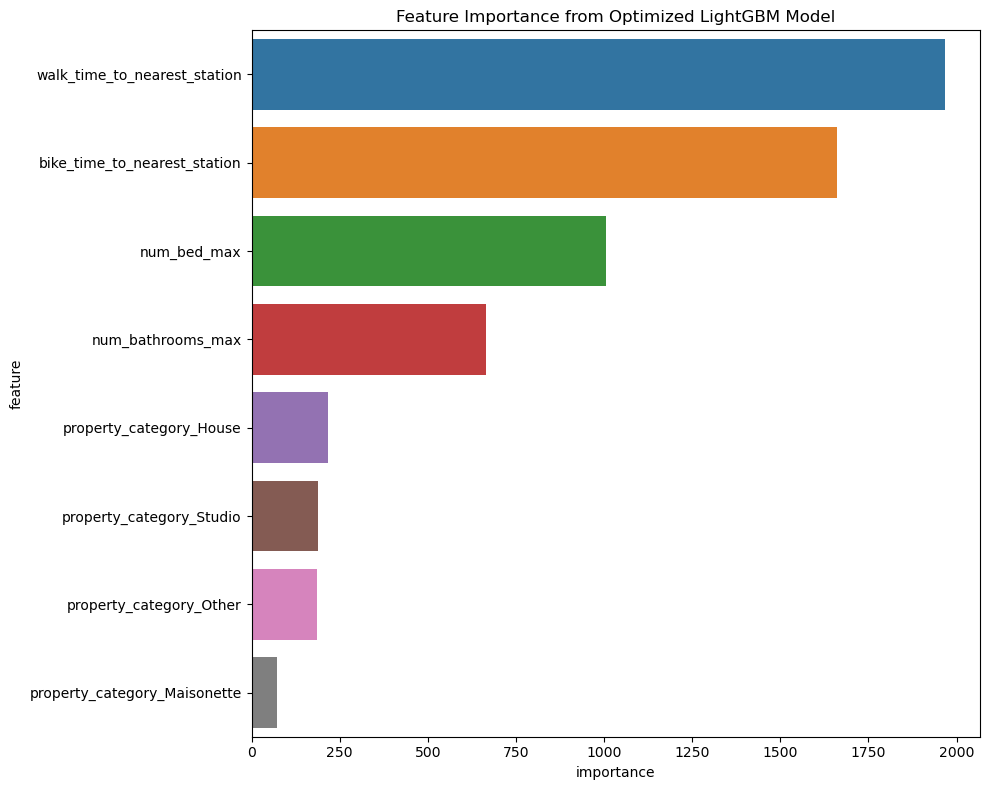

In [12]:
# --- 提取并可视化特征重要性 ---
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgbm.feature_importances_
}).sort_values('importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance from Optimized LightGBM Model')
plt.tight_layout()
plt.show()

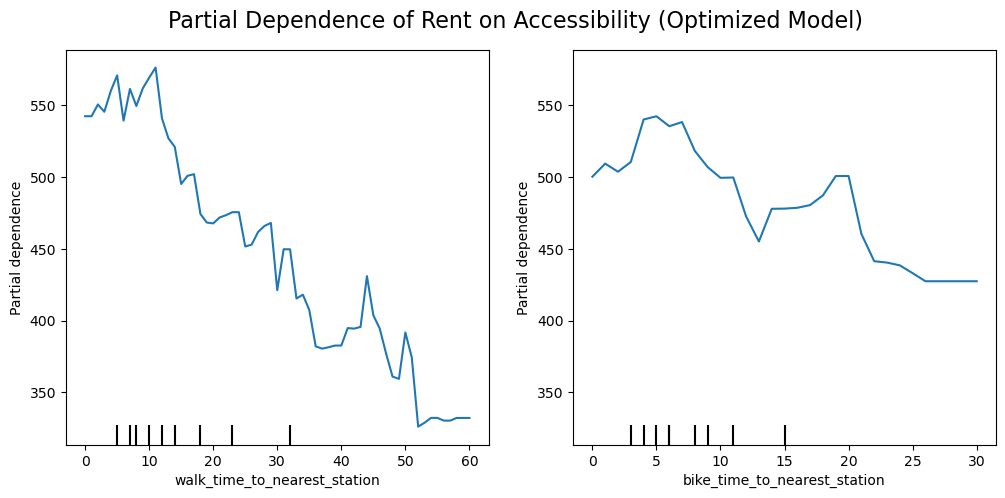

In [16]:
# --- 绘制偏依赖图 ---
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)
display = PartialDependenceDisplay.from_estimator(
    lgbm,
    X_train,
    features=['walk_time_to_nearest_station', 'bike_time_to_nearest_station'],
    ax=ax
)
fig.suptitle('Partial Dependence of Rent on Accessibility (Optimized Model)', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()